In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

## **Problem Statement.**

You would like a model which can predict housing prices given the size of the house.

Let's use the same two data points as a house with 1000 square feet sold for \$300,000 and a house with 2000 square feet sold for \$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [5]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

## **Computing Cost.**

Another notation for the Cost function in this lesson.

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 

where

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.

The code below calculates cost by looping over each example. In each loop:

+ `f_wb`: a prediction is calculated
+ the difference between the target and the prediction is calculated and squared.
+ this is added to the total cost.

In [2]:
def compute_cost(x, y, w, b): 
  """
  Computes the cost function for linear regression.
  
  Args:
    x (ndarray (m,)): Data, m examples 
    y (ndarray (m,)): target values
    w, b (scalar)    : model parameters  
  
  Returns
      total_cost (float): The cost of using w,b as the parameters for linear regression
              to fit the data points in x and y
  """
  # number of training examples
  m = x.shape[0] 
  
  cost_sum = 0 
  for i in range(m): 
      f_wb = w * x[i] + b   
      cost = (f_wb - y[i]) ** 2  
      cost_sum = cost_sum + cost  
      
  total_cost = (1 / (2 * m)) * cost_sum  

  return total_cost

In [8]:
plt_intuition(x_train, y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

## **Cost Function Visualization - 3D.**

You can see how cost varies with respect to both `w` and `b` by plotting in 3D or using a contour plot.

It is worth noting that some of the plotting can become quite involved. The plotting routines are provided and while it can be instructive to read through the code to become familiar with the methods, it is not needed to complete the course successfully. The routines are in lab_utils_uni.py in the local directory.

In [ ]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])

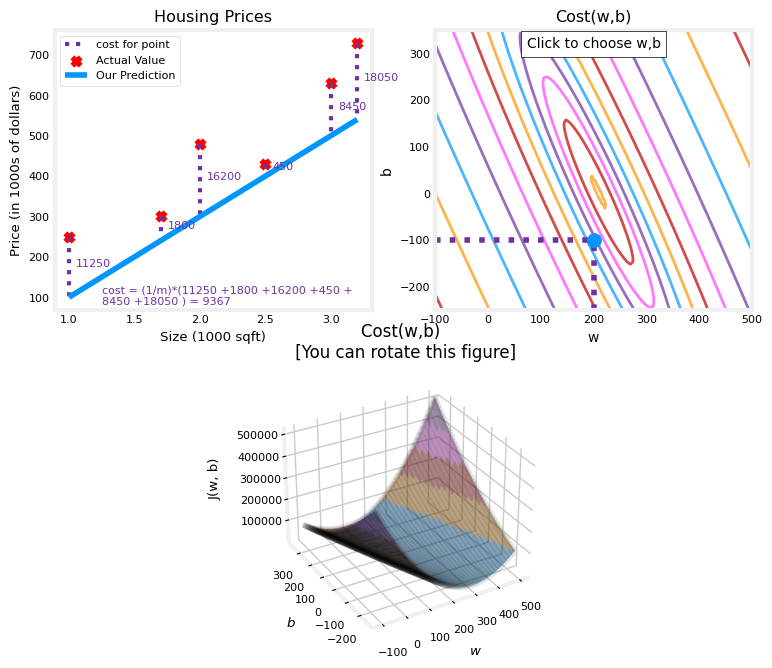

In [ ]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

The above code creates a graph to display the cost function and data points. This figure allows the user to select `w` and `b` values by clicking on the graph. When the user clicks, new `w` and `b` values are calculated and displayed on the graph.

Let's look at each part of the code:

+ Function `plt_stationary(x_train, y_train)`: This is a function to create graphs. It creates a square containing three subgraphs: a line graph, a level curve graph, and a surface graph. This function also calculates the cost function value for `w` and `b` values in a given range and plots contour lines on the level curve graph.
+ Class `plt_update_onclick`: This is a class to handle click events on the graph. When the user clicks on the level curve graph, this layer recalculates the `w` and `b` values based on the mouse position and recalculates the cost function value. It then deletes and redraws lines on the line graph and updates points on the level curve and surface graphs.

### **Convex Cost surface.**
The fact that the cost function squares the loss ensures that the 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because the $w$ and $b$ dimensions scale differently, this is not easy to recognize. The following plot, where $w$ and $b$ are symmetric, was shown in lecture:

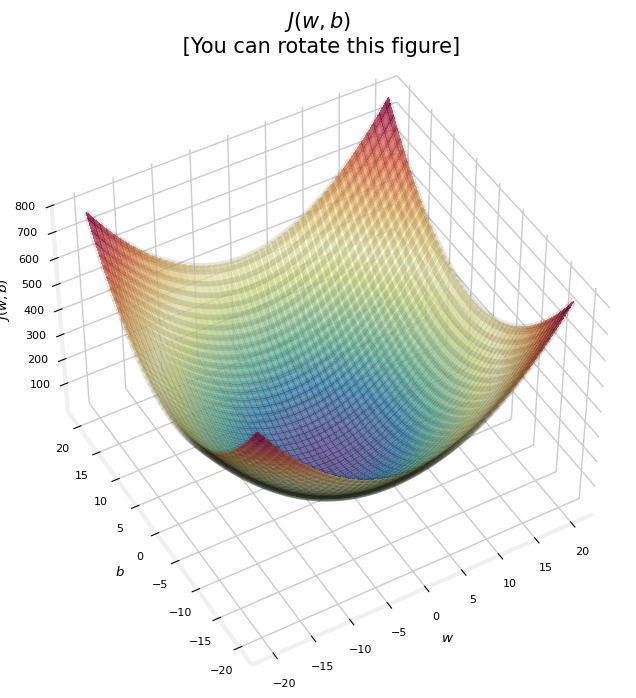

In [9]:
soup_bowl()

___
## **References:**

$[1].$ *DeepLearning.AI - Andrew Ng. Machine Learning Specialization, Supervised Machine Learning: Regression and Classification.*